# Linear Regression

## Inorder to analyze the dataset  we did a prelimenary test to find out the trend and relationship between the Critic Score and Total Sales

### Target variable and features

- Target variable (y): Total_Sales
- X: Critic_Score

### Preprocessing the Data
1. Dropping columns that are not needed
2. Finding Null Values and dropping them
3. Visually prepare and inspect the relationship between Critic Score and Total Sales.
4. Prepare to use the Linear Regression Model
5. Format the data to meet the models scikit library
6. Examine the X array
7. Examining the parameters of our model and find the best fit for our red line



In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# Import our input dataset
file_path = Path('./Resources/all_columns_df.csv')
all_columns_df = pd.read_csv(file_path)
all_columns_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09


In [12]:
all_columns_df.columns.tolist()

['Genre', 'Publisher', 'Developer_x', 'Critic_Score', 'Total_Sales']

In [13]:
all_columns_df.dtypes

Genre            object
Publisher        object
Developer_x      object
Critic_Score    float64
Total_Sales     float64
dtype: object

In [14]:
all_columns_df.count()

Genre           4706
Publisher       4706
Developer_x     4706
Critic_Score    4706
Total_Sales     4706
dtype: int64

In [16]:
# Select Critic_Score & Total_Sales
critic_vs_sales = all_columns_df[['Critic_Score', 'Total_Sales']]
critic_vs_sales.head(5)

,Critic_Score,Total_Sales
0,7.7,82.86
1,10.0,40.24
2,8.2,37.14
4,8.0,33.09
5,9.4,31.38


In [17]:
critic_vs_sales.count()

Critic_Score    4706
Total_Sales     4706
dtype: int64

In [18]:
# Find null value
for column in critic_vs_sales.columns:
    print(f'Column {column} has {critic_vs_sales[column].isnull().sum()} null values')

Column Critic_Score has 0 null values
Column Total_Sales has 0 null values


In [19]:
critic_vs_sales.head()

,Critic_Score,Total_Sales
0,7.7,82.86
1,10.0,40.24
2,8.2,37.14
4,8.0,33.09
5,9.4,31.38


In [20]:
critic_vs_sales.shape

(4706, 2)

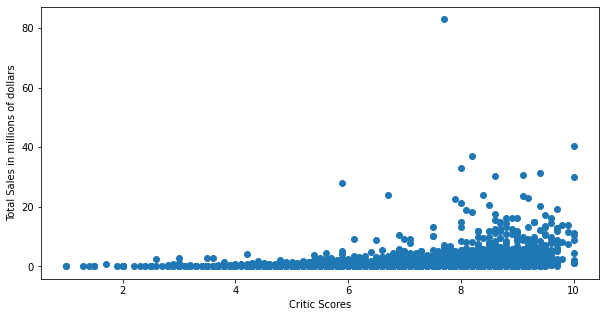

In [22]:
# Visually inspect the relationship between Total Sales & Critic Score
plt.scatter(critic_vs_sales.Critic_Score, critic_vs_sales.Total_Sales)
plt.ylabel('Total Sales in millions of dollars')
plt.xlabel('Critic Scores')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

# Prepare For Scikit-Learn

In [23]:
# Format the data to meet the requirements of the Scikit-learn library
X = critic_vs_sales.Critic_Score.values.reshape(-1, 1)

In [24]:
#  Examine the first five entries in X
X[:5]

array([[ 7.7],
       [10. ],
       [ 8.2],
       [ 8. ],
       [ 9.4]])

In [25]:
X.shape

(4706, 1)

(4706,)


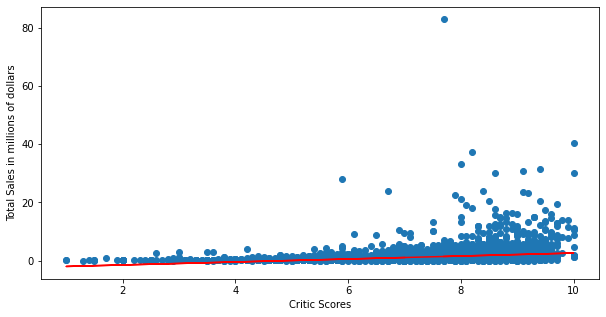

In [28]:
y = critic_vs_sales.Total_Sales
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.ylabel('Total Sales in millions of dollars')
plt.xlabel('Critic Scores')
plt.show()

In [29]:
# Examine the specific parameters of our model: the slope and the y-intercept.
# The slope is represented by model.coef_, and model.intercept_ is the y-intercept
print(model.coef_)
print(model.intercept_)

[0.51138194]
-2.540240385111871


In [30]:
# The best fit line is in red, drawn through the predictions.
critic_vs_sales['Critic_Score'].max()

10.0